<a href="https://colab.research.google.com/github/RonaldDonfack/Bole/blob/main/titanic_analysis_nathan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction

## 1. Import Libraries and Load Data

First, let's import the necessary libraries and load our training and testing datasets.

In [4]:
# Import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test (1).csv
Saving train.csv to train.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Exploratory Data Analysis (EDA)

Now, let's explore the data to understand its structure, find patterns, and identify missing values.

In [ ]:
# Your EDA code here.
# Examples:
# - train_df.info()
# - train_df.describe()
# - sns.countplot(x='Survived', data=train_df)
# - sns.catplot(x='Sex', col='Survived', kind='count', data=train_df)

## 3. Data Cleaning & Feature Engineering

Based on our EDA, we'll clean the data by handling missing values and create new features to improve our model's performance.

🔹 Dimensions du jeu d'entraînement : (891, 12)
🔹 Dimensions du jeu de test : (418, 11)

🔹 Aperçu des premières lignes du dataset :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



🔹 Informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

🔹 Statistiques descriptives :


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



🔹 Valeurs manquantes par colonne :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


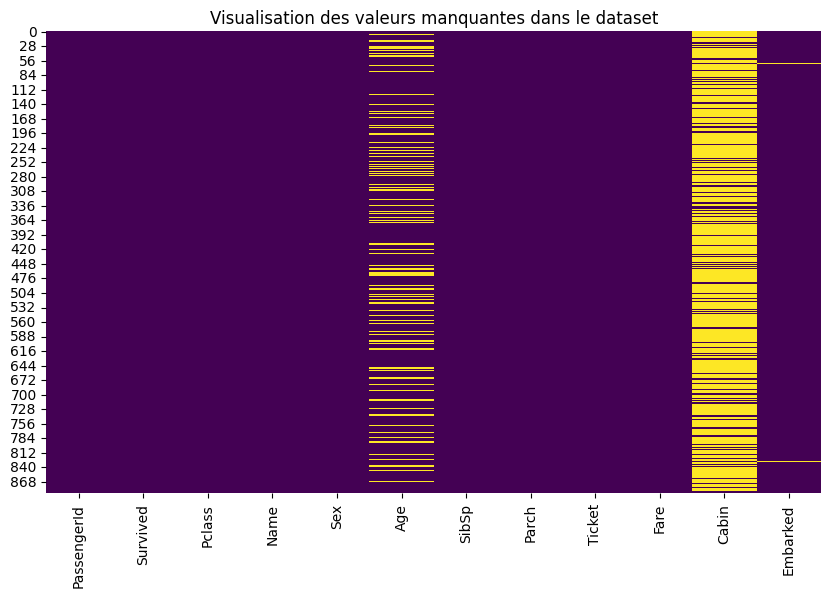

/tmp/ipython-input-1394415386.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette='Set2')


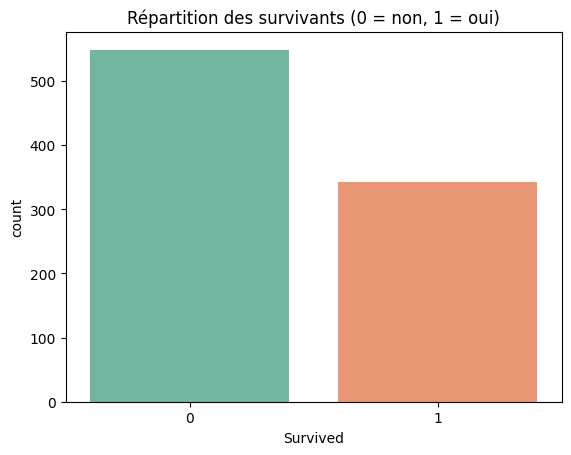

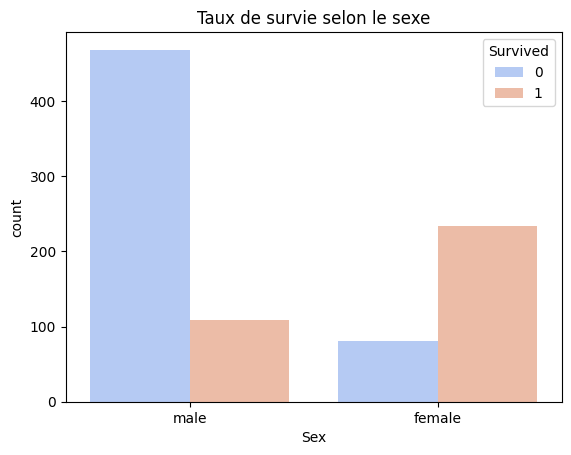

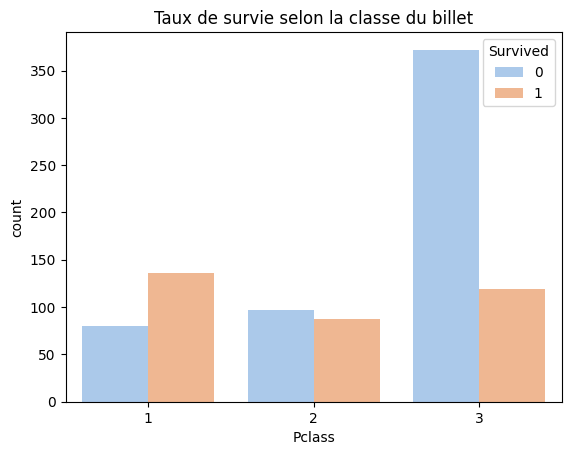

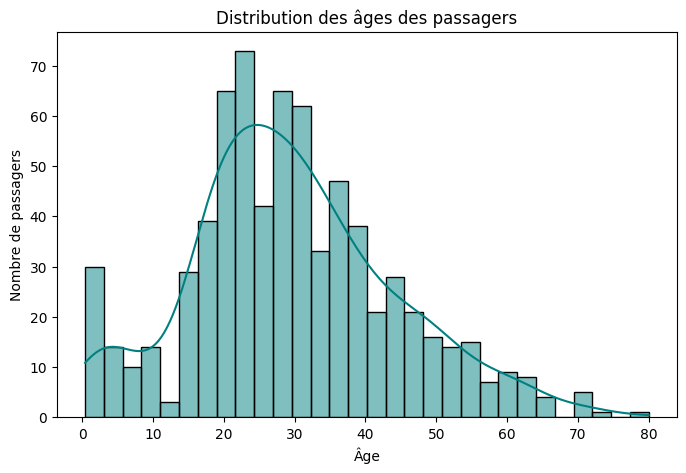

/tmp/ipython-input-1394415386.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=train_df, palette='muted')


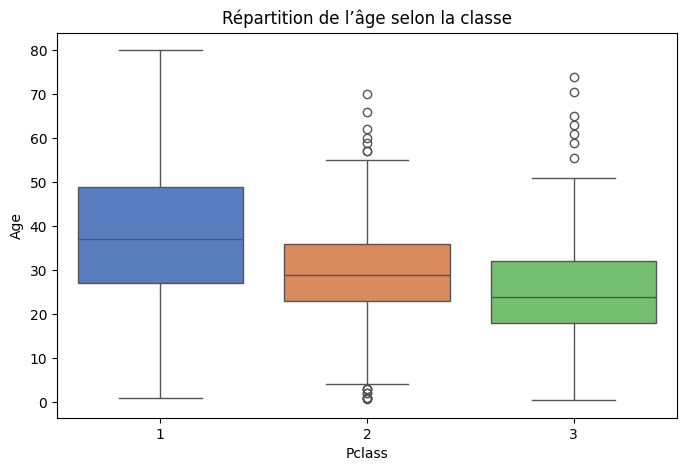

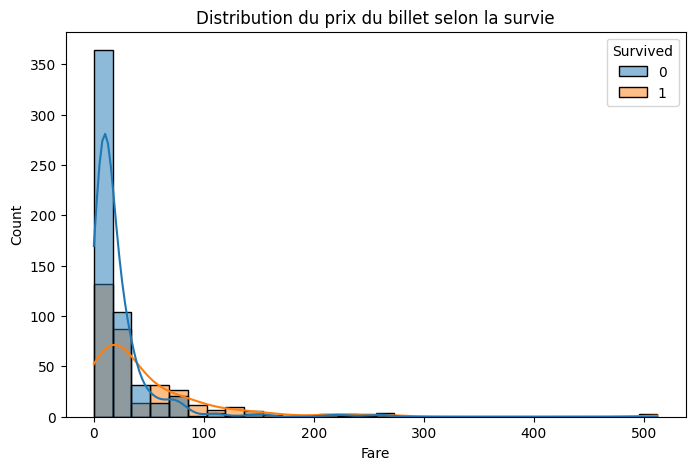

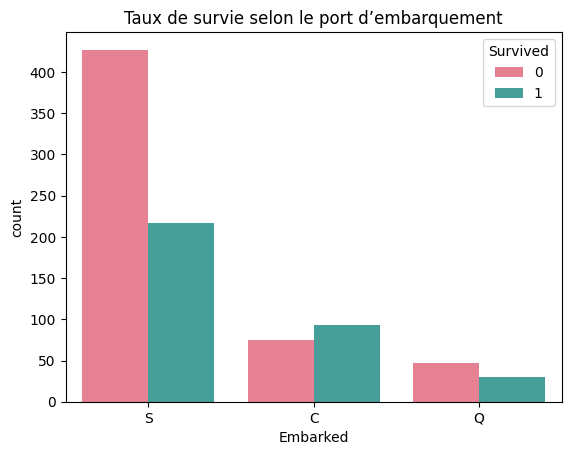

In [5]:
# Your data cleaning and feature engineering code here.
# Examples:
# - Handle missing 'Age' values
# - Convert 'Sex' to numerical values
# - Create a 'FamilySize' feature
# --- Informations générales ---
print("🔹 Dimensions du jeu d'entraînement :", train_df.shape)
print("🔹 Dimensions du jeu de test :", test_df.shape)

print("\n🔹 Aperçu des premières lignes du dataset :")
display(train_df.head())

print("\n🔹 Informations sur les colonnes :")
train_df.info()

print("\n🔹 Statistiques descriptives :")
display(train_df.describe())

# --- Vérification des valeurs manquantes ---
print("\n🔹 Valeurs manquantes par colonne :")
print(train_df.isnull().sum())

plt.figure(figsize=(10,6))
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisation des valeurs manquantes dans le dataset")
plt.show()

# --- Visualisations des relations importantes ---

# 1️⃣ Répartition des survivants
sns.countplot(x='Survived', data=train_df, palette='Set2')
plt.title("Répartition des survivants (0 = non, 1 = oui)")
plt.show()

# 2️⃣ Taux de survie selon le sexe
sns.countplot(x='Sex', hue='Survived', data=train_df, palette='coolwarm')
plt.title("Taux de survie selon le sexe")
plt.show()

# 3️⃣ Taux de survie selon la classe du billet
sns.countplot(x='Pclass', hue='Survived', data=train_df, palette='pastel')
plt.title("Taux de survie selon la classe du billet")
plt.show()

# 4️⃣ Distribution de l’âge
plt.figure(figsize=(8,5))
sns.histplot(train_df['Age'], kde=True, bins=30, color='teal')
plt.title("Distribution des âges des passagers")
plt.xlabel("Âge")
plt.ylabel("Nombre de passagers")
plt.show()

# 5️⃣ Boxplot de l’âge selon la classe
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass', y='Age', data=train_df, palette='muted')
plt.title("Répartition de l’âge selon la classe")
plt.show()

# 6️⃣ Prix du billet (Fare) et survie
plt.figure(figsize=(8,5))
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=30, kde=True)
plt.title("Distribution du prix du billet selon la survie")
plt.show()

# 7️⃣ Port d’embarquement et survie
sns.countplot(x='Embarked', hue='Survived', data=train_df, palette='husl')
plt.title("Taux de survie selon le port d’embarquement")
plt.show()

## 4. Model Training and Evaluation

It's time to choose a model, train it on our processed data, and see how well it performs.

In [13]:
print(data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [22]:
# Your model training code here.
# Examples:
# - from sklearn.model_selection import train_test_split
# - from sklearn.linear_model import LogisticRegression
# - Define features (X) and target (y)
# - Split data, train model, check accuracy


# === MODEL TRAINING (Bloc A - Préparation & Recherche des paramètres) ===

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# --- Préparation améliorée des données ---
data = train_df.copy()

# Remplir les valeurs manquantes
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Extraire un titre depuis le nom
train_df['Title'] = train_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
train_df['Title'] = train_df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
     'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df['Title'] = train_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
data['Title'] = train_df['Title']

# Encoder les variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
data['Title'] = data['Title'].map(title_mapping).fillna(0)

# Créer de nouvelles variables
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

# Variables finales
X = data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']]
y = data['Survived']

# Séparation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Recherche des meilleurs hyperparamètres ---
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10, 12, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("🔍 Meilleurs paramètres trouvés :", grid.best_params_)
print(f"🌟 Précision moyenne en validation croisée : {grid.best_score_:.4f}")

# On garde le meilleur modèle pour la suite
best_model = grid.best_estimator_



🔍 Meilleurs paramètres trouvés : {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
🌟 Précision moyenne en validation croisée : 0.8216



✅ Précision finale du modèle Decision Tree optimisé : 0.8324

🔹 Rapport de classification :
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       110
           1       0.79      0.77      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



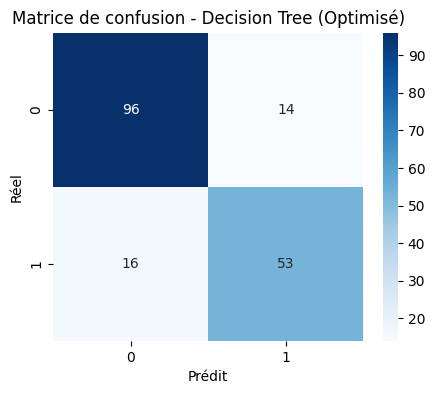

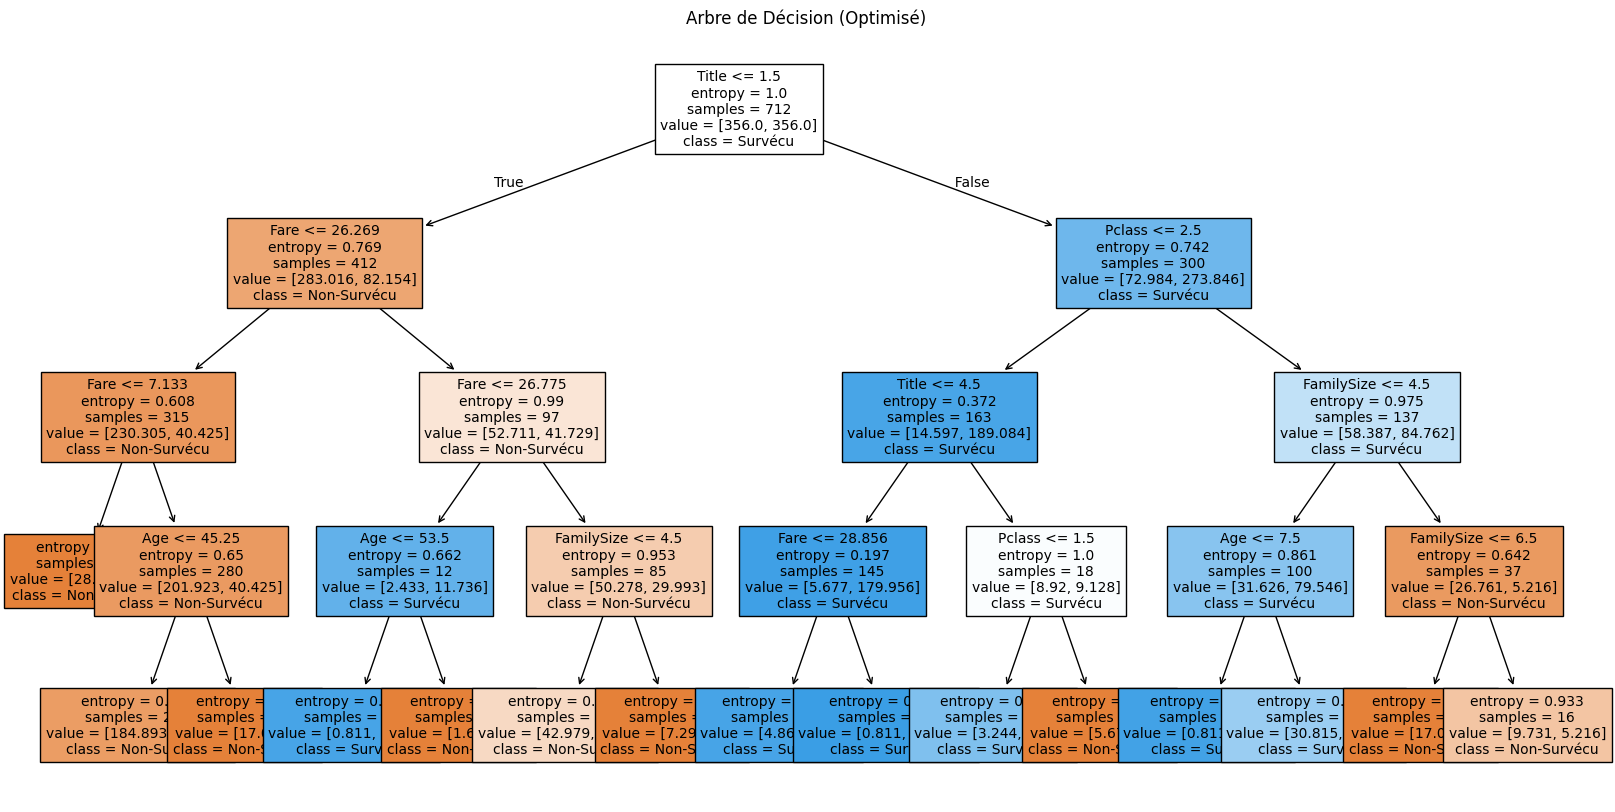

In [23]:
# === MODEL EVALUATION (Bloc B - Entraînement final et résultats) ===

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

# Entraînement final sur l'ensemble d'entraînement
best_model.fit(X_train, y_train)

# Prédictions sur la partie validation
y_pred = best_model.predict(X_valid)

# Évaluation
accuracy = accuracy_score(y_valid, y_pred)
print(f"\n✅ Précision finale du modèle Decision Tree optimisé : {accuracy:.4f}\n")
print("🔹 Rapport de classification :")
print(classification_report(y_valid, y_pred))

# Matrice de confusion
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_valid, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Decision Tree (Optimisé)")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# Visualisation de l’arbre
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=['Non-Survécu', 'Survécu'],
          filled=True, fontsize=10)
plt.title("Arbre de Décision (Optimisé)")
plt.show()


## 5. Create Submission File

Finally, we'll use our trained model to make predictions on the test set and generate the submission file in the required format.

In [24]:
# Your submission generation code here.
# - Process the test_df in the same way as train_df
# - model.predict(X_test)
# - Create a submission DataFrame and save to 'submission.csv'

# === CREATE SUBMISSION 2 (à partir du modèle best_model) ===

# Copie du jeu de test
test_data = test_df.copy()

# --- Nettoyage identique à train_df ---
test_data['Age'] = test_data['Age'].fillna(train_df['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(train_df['Fare'].median())
test_data['Embarked'] = test_data['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Extraction du titre à partir du nom
test_data['Title'] = test_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
     'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_data['Title'] = test_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')

# Encodage des variables
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
test_data['Title'] = test_data['Title'].map(title_mapping).fillna(0)

# Nouvelles variables comme dans le training
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)

# --- Variables finales (mêmes que pour X_train) ---
X_test = test_data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
                    'FamilySize', 'IsAlone', 'Title']]

# --- Prédictions finales ---
test_predictions = best_model.predict(X_test)

# --- Création du DataFrame de soumission ---
submission2 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

# Sauvegarde en CSV
submission2.to_csv('submission2.csv', index=False)
print("✅ Fichier 'submission2.csv' créé avec succès !")

# Aperçu du résultat
submission2.head()


✅ Fichier 'submission2.csv' créé avec succès !


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
